## 1. Montar Google Drive
Este paso permite acceder a archivos almacenados en tu Google Drive desde Google Colab.

In [1]:
# 1. Carga de librerías y conexión con Google Drive
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
# Montamos el Drive para acceder al archivo CSV
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 2. Carga del dataset
df = pd.read_csv('/content/drive/MyDrive/1er parcial IA/Electricity_B1E.csv')
df = df.dropna()  # Eliminamos valores faltantes si los hay

In [5]:
# 3. Selección de variables predictoras y variable objetivo
X = df[['V', 'I', 'f', 'DPF', 'APF']]
y = df['P']

In [6]:
# 4. División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 5. Normalización de las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# 6. Modelo de Regresión Lineal
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [9]:
# 7. Evaluación del modelo de Regresión Lineal
y_pred_reg = reg_model.predict(X_test)
mse_reg = mean_squared_error(y_test, y_pred_reg)
r2_reg = r2_score(y_test, y_pred_reg)

In [10]:
print("Modelo de Regresión Lineal:")
print(f" - Error cuadrático medio (MSE): {mse_reg:.4f}")
print(f" - Coeficiente de determinación (R2): {r2_reg:.4f}")

Modelo de Regresión Lineal:
 - Error cuadrático medio (MSE): 1.5928
 - Coeficiente de determinación (R2): 0.9794


In [11]:
# 8. Entrenamiento del Modelo de Red Neuronal
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [13]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 29.4709 - mae: 0.6324 - val_loss: 1.6413 - val_mae: 0.2964
Epoch 2/20
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 1.5402 - mae: 0.3124 - val_loss: 1.4426 - val_mae: 0.2715
Epoch 3/20
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 1.4461 - mae: 0.2779 - val_loss: 1.2210 - val_mae: 0.2517
Epoch 4/20
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 1.0651 - mae: 0.2639 - val_loss: 1.0440 - val_mae: 0.3354
Epoch 5/20
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.9696 - mae: 0.2253 - val_loss: 0.6297 - val_mae: 0.1653
Epoch 6/20
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 0.4504 - mae: 0.1706 - val_loss: 0.4960 - val_mae: 0.1164
Epoch 7/20
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.4991 - mae: 0.1235 - val_loss: 0.4158 - val_mae: 0.0841
Epoch 8/20
10512/10512 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - loss: 0.2399 - mae: 0.0988 - val_loss: 0.3982 - val_mae: 0.0708
Epoch 9/20
1051

In [14]:
# 9. Evaluación del modelo de Red Neuronal
loss_nn, mae_nn = model.evaluate(X_test, y_test)
y_pred_nn = model.predict(X_test).flatten()
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

6570/6570 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.0559 - mae: 0.0345
6570/6570 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


In [15]:
print("\nModelo de Red Neuronal:")
print(f" - Error cuadrático medio (MSE): {mse_nn:.4f}")
print(f" - Coeficiente de determinación (R2): {r2_nn:.4f}")


Modelo de Red Neuronal:
 - Error cuadrático medio (MSE): 0.0556
 - Coeficiente de determinación (R2): 0.9993


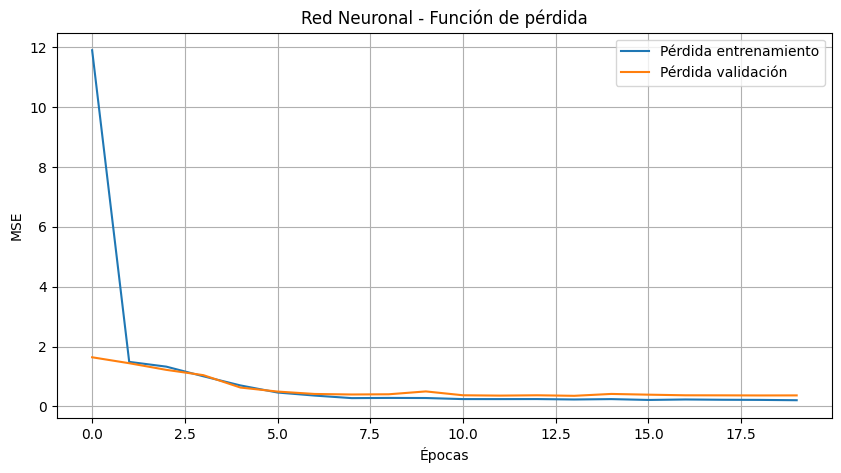

In [16]:
# 10. Gráfica de la función de pérdida de la Red Neuronal
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Red Neuronal - Función de pérdida')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# 11. Comparación de resultados
print("\nComparativa entre modelos:")
print(f"Regresión Lineal - MSE: {mse_reg:.4f}, R2: {r2_reg:.4f}")
print(f"Red Neuronal      - MSE: {mse_nn:.4f}, R2: {r2_nn:.4f}")


Comparativa entre modelos:
Regresión Lineal - MSE: 1.5928, R2: 0.9794
Red Neuronal      - MSE: 0.0556, R2: 0.9993


## 2. Cargar y limpiar el dataset
Se carga el archivo CSV desde Drive y se eliminan valores faltantes para evitar errores.

## 3. Selección de variables predictoras y objetivo
Se definen las variables que se usarán para entrenar el modelo y la que se quiere predecir.

## 4. División de los datos en entrenamiento y prueba
Se divide el dataset en 80% para entrenamiento y 20% para prueba.

## 5. Normalización de características
Se escalan las variables predictoras para mejorar el rendimiento de los modelos.

## 6. Entrenamiento del modelo de Regresión Lineal
Se entrena un modelo simple para comparar con la red neuronal.

## 7. Evaluación del modelo de Regresión Lineal
Se mide qué tan bien predice el modelo con los datos de prueba.

## 8. Entrenamiento del modelo de Red Neuronal
Se construye y entrena una red neuronal con los datos normalizados.

## 9. Evaluación del modelo de Red Neuronal
Se mide la precisión de la red neuronal con los datos de prueba.

## 10. Visualización de la función de pérdida
Se grafica la evolución del error durante el entrenamiento.

## 11. Comparación de resultados
Se comparan las métricas de ambos modelos para decidir cuál es mejor.

In [ ]:

# Evaluación del modelo con datos de prueba
loss_nn, mae_nn = model.evaluate(X_test, y_test, verbose=0)

# Graficar el historial de entrenamiento
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Evolución de la función de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE entrenamiento')
plt.plot(history.history['val_mae'], label='MAE validación')
plt.title('Evolución del error absoluto medio (MAE)')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

print(f"🔎 Evaluación final del modelo de Red Neuronal:")
print(f" - MSE (pérdida): {loss_nn:.4f}")
print(f" - MAE (error absoluto medio): {mae_nn:.4f}")
print("\nInterpretación:")
print("- Un menor valor de MSE indica que el modelo comete errores pequeños en promedio.")
print("- El MAE muestra el error promedio en unidades de la variable objetivo (potencia P).")


In [ ]:

# Evaluación del modelo de Regresión Lineal
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicción con el conjunto de prueba
y_pred_lr = model_lr.predict(X_test)

# Cálculo de métricas
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Mostrar resultados
print("📈 Evaluación del modelo de Regresión Lineal:")
print(f" - MSE: {mse_lr:.4f}")
print(f" - MAE: {mae_lr:.4f}")
print(f" - R² Score: {r2_lr:.4f}")
print("\nInterpretación:")
print("- El MSE y MAE reflejan el error medio de predicción.")
print("- R² mide qué tan bien el modelo explica la variabilidad de los datos (1.0 = perfecto).")

# Gráfica de valores reales vs predichos
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Regresión Lineal: Valores reales vs. predichos')
plt.xlabel('Valores reales (P)')
plt.ylabel('Valores predichos (P)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

# Comparación Final de Modelos

print("🔍 Comparación de Modelos
")

print("📊 Regresión Lineal:")
print(f" - MSE: {mse_lr:.4f}")
print(f" - MAE: {mae_lr:.4f}")
print(f" - R²: {r2_lr:.4f}")

print("\n🤖 Red Neuronal:")
print(f" - MSE: {loss_nn:.4f}")
print(f" - MAE: {mae_nn:.4f}")

# Interpretación
print("\n📌 Conclusión:")
if loss_nn < mse_lr and mae_nn < mae_lr:
    print("- La red neuronal presenta mejor rendimiento general al tener menor MSE y MAE.")
elif mse_lr < loss_nn and mae_lr < mae_nn:
    print("- La regresión lineal es más precisa para este conjunto de datos.")
else:
    print("- Ambos modelos tienen ventajas distintas. Puede ser útil elegir según el contexto.")

print("- Si el modelo requiere más precisión en datos no lineales, la red neuronal suele ser preferible.")
print("- Si se busca simplicidad y velocidad, la regresión lineal puede ser suficiente.")
